In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [68]:
# import sys
# !{sys.executable} -m conda install pandas
print(pd.__version__)

0.25.3


In [69]:
# import matplotlib.dates as mdates
# import cufflinks as cf
# import plotly
# import plotly.graph_objs as go
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# import plotly.express as px

## Part 1: Linear Regression

### Data description
The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:


* crim: per capita crime rate by town.

* zn: proportion of residential land zoned for lots over 25,000 sq.ft.

* indus: proportion of non-retail business acres per town.

* chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

* nox: nitrogen oxides concentration (parts per 10 million).

* rm: average number of rooms per dwelling.

* age: proportion of owner-occupied units built prior to 1940.

* dis: weighted mean of distances to five Boston employment centres.

* rad: index of accessibility to radial highways.

* tax: full-value property-tax rate per $10,000.

* ptratio: pupil-teacher ratio by town.

* black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

* lstat: lower status of the population (percent).

* medv: median value of owner-occupied homes in $1000s.

### Load data

For the first part we will use a simple dataset that is available on SKlearn. You can go through the [documentation](https://scikit-learn.org/stable/datasets/index.html#boston-dataset) for more details about the. Our job is to use the Boston Housing Dataset to try and predict the price of a house given various attributes such as crime rate in the area, size etc.

In [240]:
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [241]:
df = data

### Explore Data

#### Check if any cleaning is required

Note that this is a fairly clean dataset, regardless, it is always a good idea to see if there are any missing values and if the data types are all valid inputs for regression analysis. 

This may or may not lead to any results, but in any Data Science project it is a good idea to minimize assumptions and be sure of what you are doing. There isn't a need to overthink this, just make sure there are no surprises in the data.

In [242]:
# If False it means there are no Null Values
df.isna().any().all()

False

In [243]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [245]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Find out important features

Before any features are used in Linear Regression, checking for collinearity is essential. While again, this is less essential in some cases, we want to reduce computation time while still have the highest possible accuracy.

Again, note that there is no right answer to this, you will be graded on methodology and on what you plan to do with the features. In the end what matters is having a low mean squared error, and you can come back to this part again and again if you feel adding or removing a certain feature would make your model better.

Hint: There is one very common way of checking for collinearity, if you are able to quickly and efficiently visualize correlations between all variables, it would allow you to analyize this part in an easier way. Check out the [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function in Seaborn

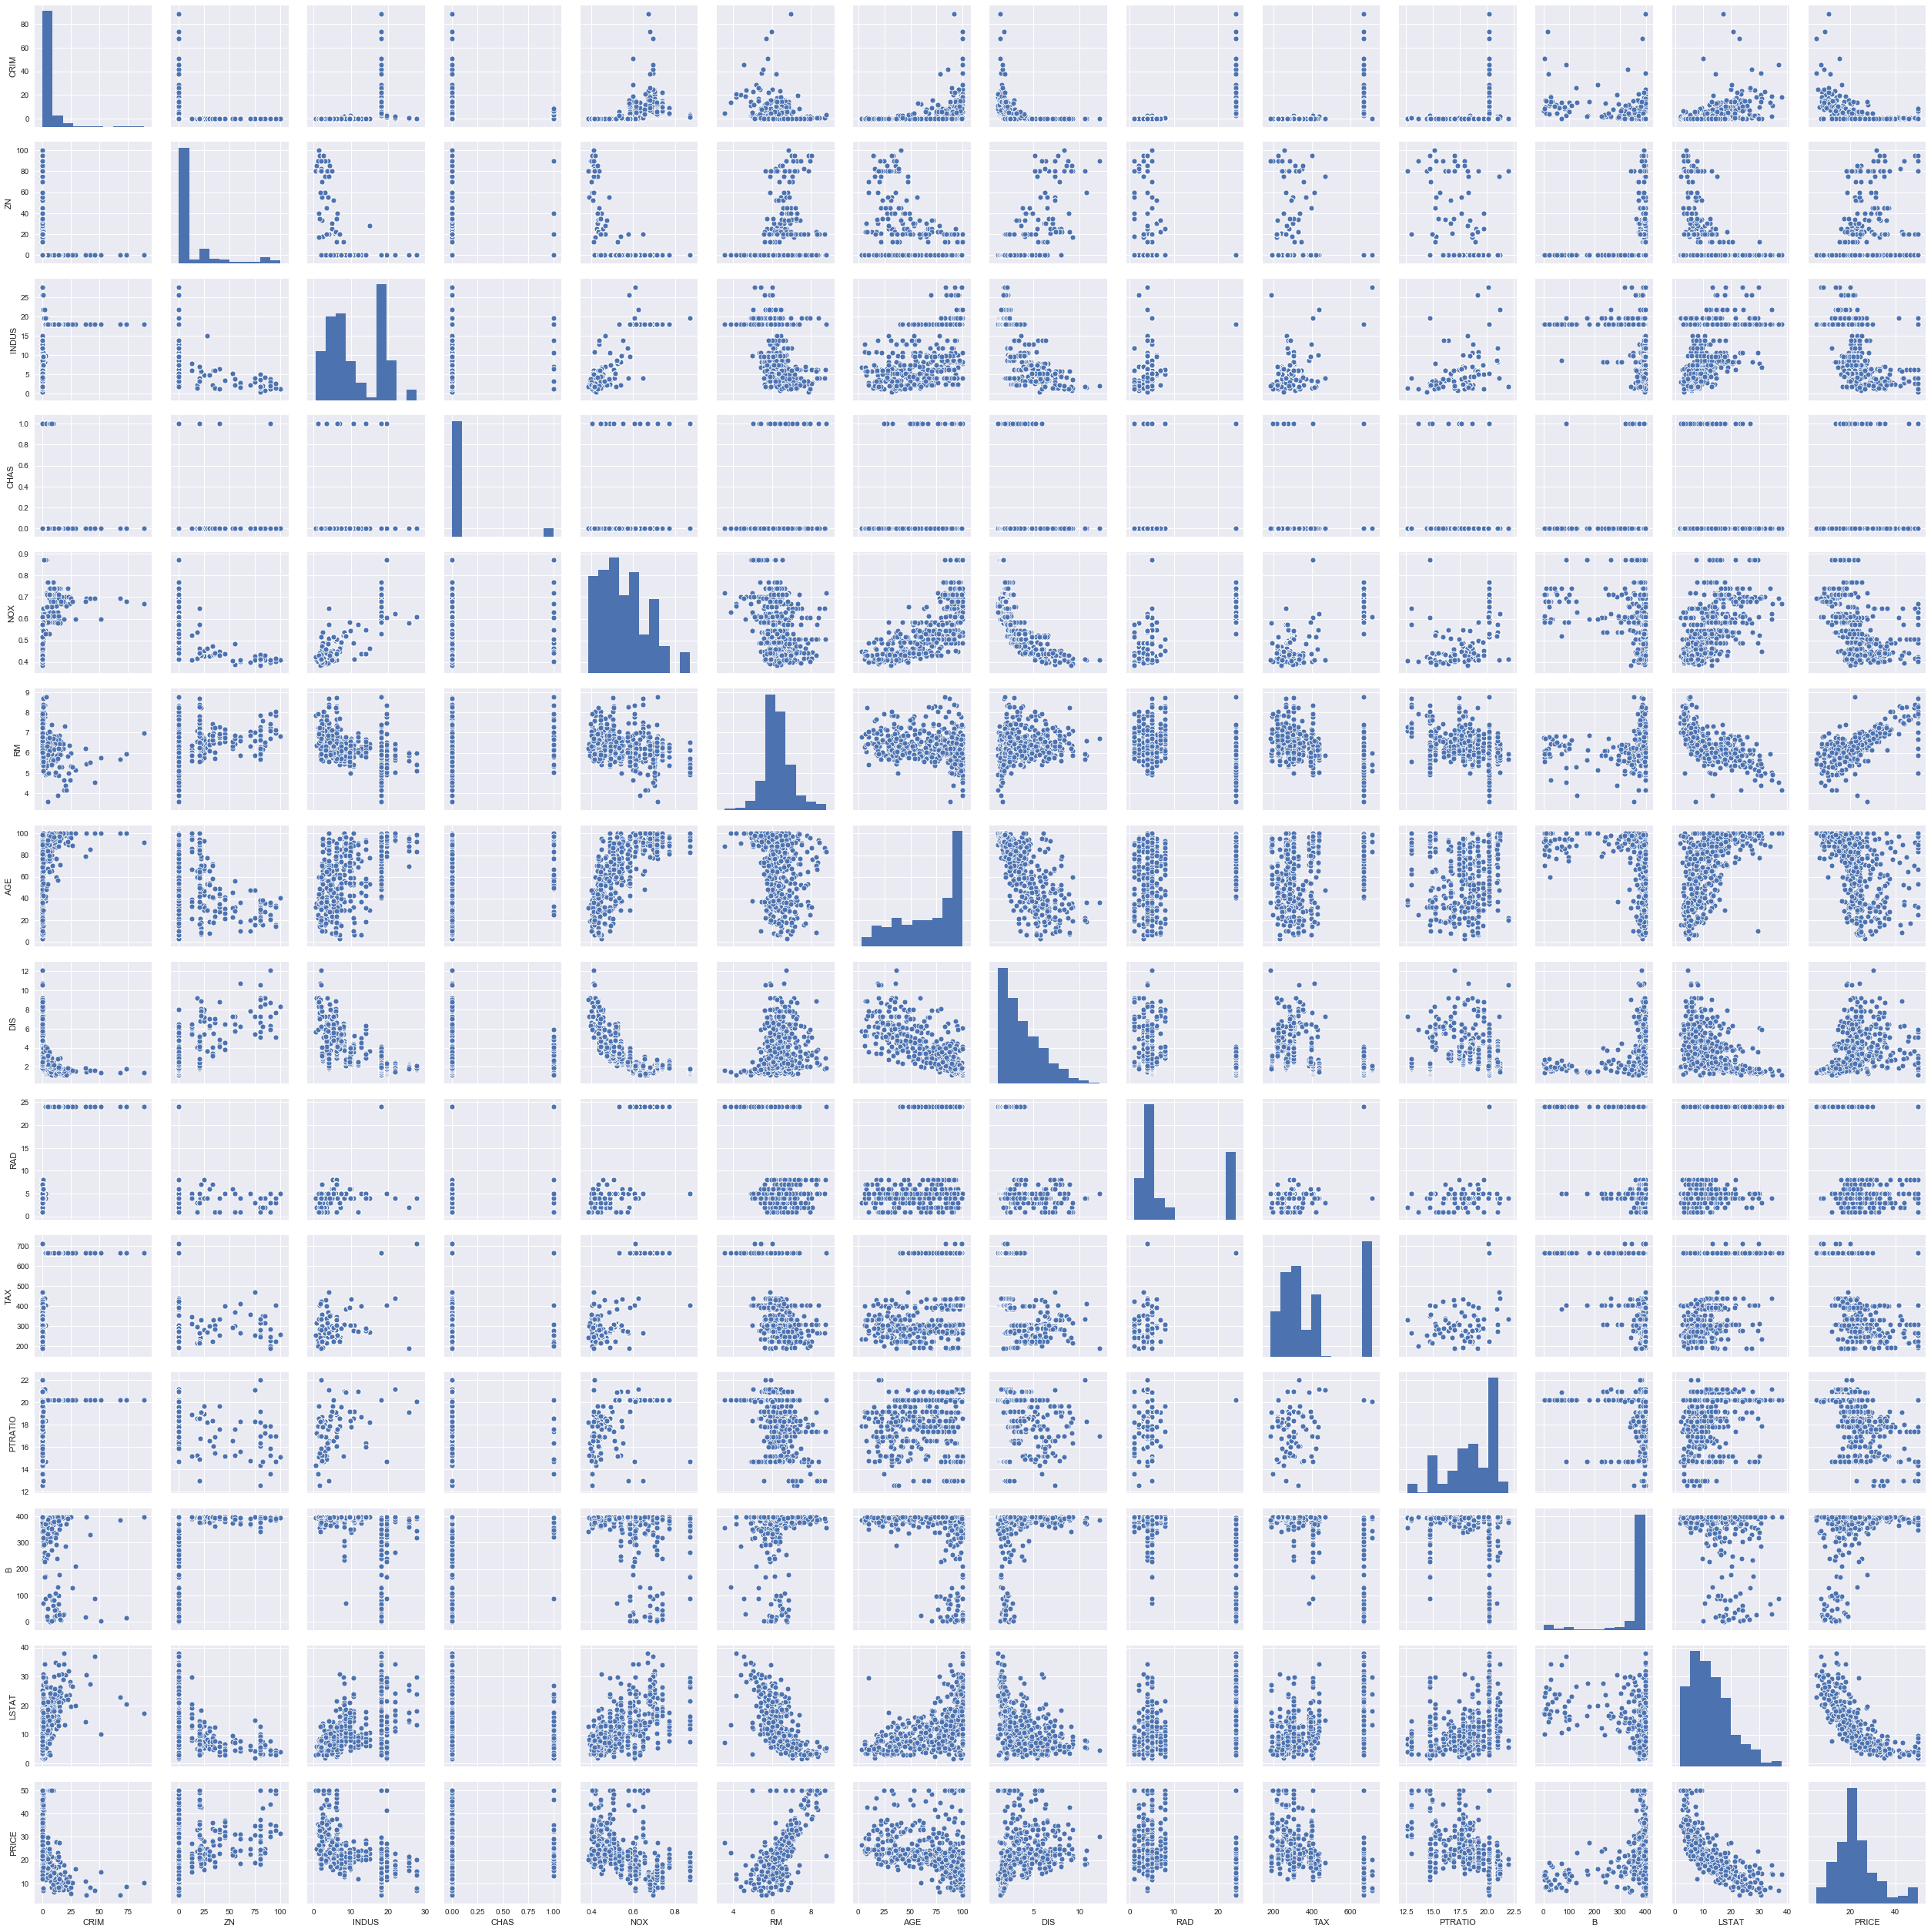

In [12]:
sns.pairplot(df)

In [246]:
corr = df.corr()

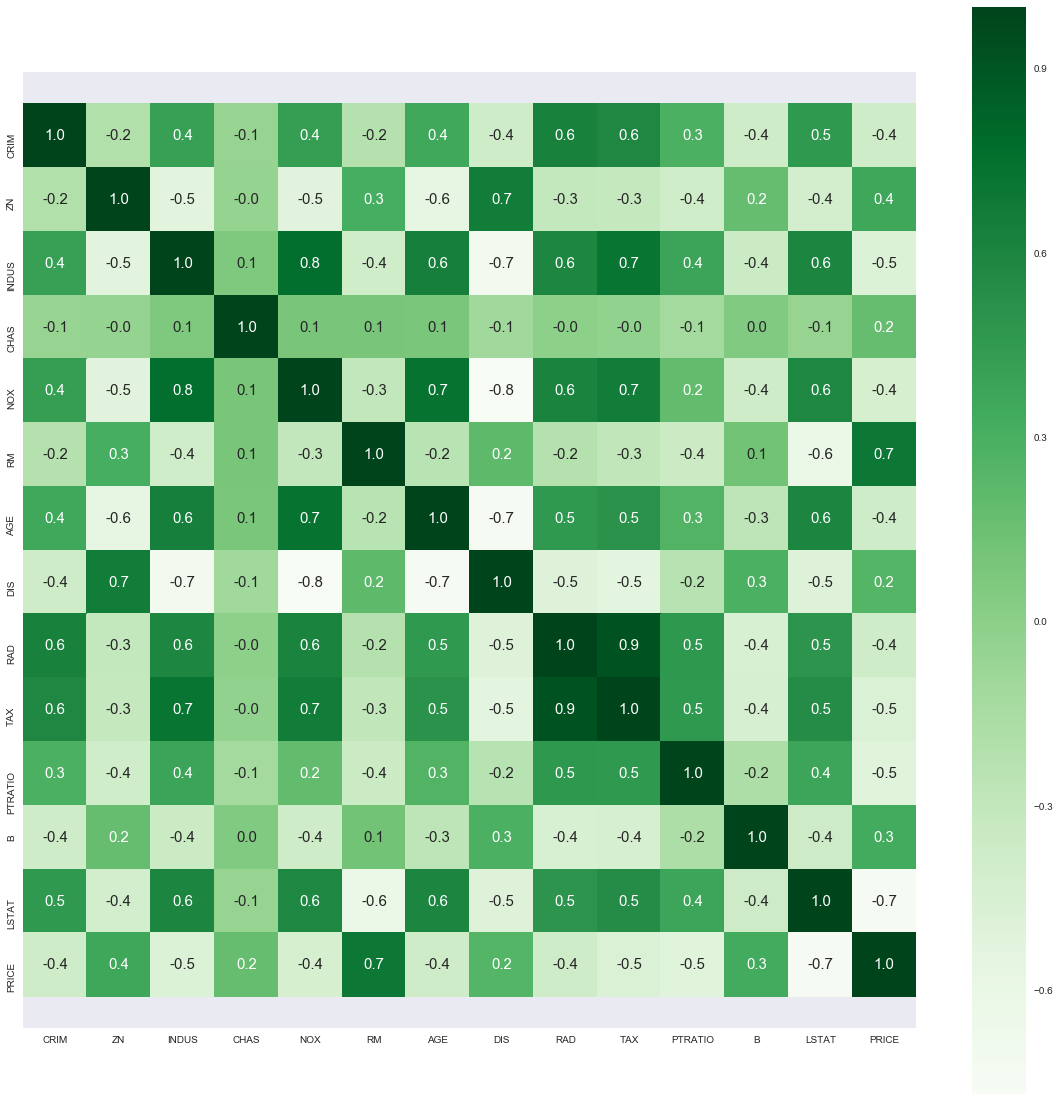

In [247]:
# The above correlation matrix can be passed directly to sns.heatmap
# This is one way of visualizing a Confusion Matrix
# Feel free to change this if you don't agree with this implementation

plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

Multicolinearity saps the statistical power of the analysis can cause the coefficients to switch signs, distorting the correct model. So to avoid this we will use the Variance Inflation Factor to see which of our features should be removed.

In [248]:
data = df[df.columns[:-1]]
def standardize(data_features):
    data_features = (data_features - data_features.mean()) /   data_features.std()
    return data_features

std_data = data.apply(standardize, axis=0)
std_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [249]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(std_data.values, i) for i in range(std_data.shape[1])]
vif["features"] = std_data.columns
vif

,VIF_Factor,features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


According to the results of the Variance Inflation Factor, there is multicollinearity among the features RAD and TAX, thus we  have to drop an feature one of them on the basis of which has the least stronger correlation. We will also drop all those with correlation below 0.3 wrt PRICE
Values between 0.3 and 0.7 (-0.3 and -0.7) indicate a moderate positive (negative) linear relationship via a fuzzy-firm linear rule. Thus we will drop both features CHAS and DIS

#### If there are any features that should dropped, do so below, and justify your decision

In [250]:
# len(df.columns)
df = df.drop(columns = ['CHAS','DIS','RAD'])

### Linear Regression

Here you will be making the SKLearn Linear Regression class. Most of the skeleton code is provided, you just have to convert the mathematical equations you have learnt in class into code. The coding in this part is very small, and ideal solutions can be done in just a few lines per function. If you take the shortcut and try to copy the solution, you will lose out on important learning. You can make helper functions if you wish. The Tutorial Notebooks can help you here - but even they don't contain the *exact and ideal* solution. 

**Note: Your solution has to be efficient**. Using simple for loops to iterate over all data-points will not earn you full marks, you should try to use vectorized versions of the equations. You have covered these in class as well, and there are plenty of online resources. The following links should help you out, but refrain from copying from them directly, **they don't contain the exact solution that can be applied to this skeleton code**

[Vectorization Implementation in Machine Learning](https://towardsdatascience.com/vectorization-implementation-in-machine-learning-ca652920c55d): Should give you a very good primer on vectorization

[Vectorized Implementation Cheat Sheet](https://medium.com/ml-ai-study-group/vectorized-implementation-of-cost-functions-and-gradient-vectors-linear-regression-and-logistic-31c17bca9181): Can be used to infer some vectorized operations

[Loss Function with Code](https://www.analyticsvidhya.com/blog/2019/08/detailed-guide-7-loss-functions-machine-learning-python-code/) take this with a grain of salt. The absolute value derivative can lead to a division by 0 if $Y - Y_{pred} = 0$

[np.where](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) can help with implementing the derivatives

**Note: Make sure you deal with exploding weights or division by zeros.** This can be done by changing the learning rates and using the right algorithms when calculating the derivatives. If you get an "overflow" error, try to **reduce the learning rate and double check your loss derivative**

In [456]:
rand_weights = np.array([[-0.90498263],
       [ 0.23592021],
       [ 0.35062363],
       [-0.29404758],
       [ 3.24526811],
       [-0.55938009],
       [-0.67017425],
       [-1.56326687],
       [ 0.89721266],
       [-1.94858332],
       [21.08318239]])

In [478]:
# This is a Linear Regression class you will be implemented
# It will work similar to how SKLearn functions work
class LinearRegression():
    @staticmethod
    def mean_squared_loss(Y, Y_pred):
        return np.mean((Y - Y_pred) ** 2)

### IMPLEMENT THIS FUNCTION
    @staticmethod
    def mean_abs_loss(Y, Y_pred):
        return np.mean(np.abs(Y-Y_pred))
    
### IMPLEMENT THIS FUNCTION
    def mean_huber_loss(self, Y_pred, Y):
        a = self.huber_alpha
        absol = np.abs(Y-Y_pred)
        flag = absol < a
        return np.mean( (flag)*(0.5*((Y-Y_pred)**2)) + (~flag)*a*(absol-0.5*a) )

    @staticmethod
    def der_squared_loss(X, Y, Y_pred):
        return (Y_pred - Y) / float(len(X))
        
    @staticmethod
    def der_abs_loss(X, Y, Y_pred):
        return np.sign(Y_pred-Y) / float(len(X))
        
    def der_huber_loss(self, X, Y, Y_pred):
        a = self.huber_alpha
        return np.where(np.abs(Y-Y_pred)<a, Y_pred-Y, -a*np.sign(Y-Y_pred)) / float(len(X))
        
    def __init__(self, fit_intercept=True, 
                    normalize=False, loss_func= 'mse', huber_alpha=1.0,
                    max_iter=1000, learning_rate = 0.05, tol=0.001):
        
        self.weights_ = None
        self.bias_ = None
        self.max_iter_ = max_iter
        self.fit_intercept_ = fit_intercept
        self.learning_rate_ = learning_rate
        self.tol_ = tol
        self.huber_alpha = huber_alpha
        self.loss_func_ = loss_func
        self.loss_dict = {
            'mse': self.mean_squared_loss,
            'abs': self.mean_abs_loss,
            'huber': self.mean_huber_loss
        }
        self.der_dict = {
            'mse': self.der_squared_loss,
            'abs': self.der_abs_loss,
            'huber': self.der_huber_loss
        }

    def _init_weights(self, num_features):
        self.weights_ = rand_weights
        # Here I used the weights of a previous run and have started with them
        # np.random.normal(size=(num_features,1)) 
        # Initializing the weights for the features
        
    def fit(self, X, Y):
        assert len(X) == len(Y), "X and Y should be of the same length"
        if self.fit_intercept_:
            # We are adding the bias here for the intercept
            X = np.concatenate((X, np.ones(shape=(len(X), 1))), axis=1)
        self._init_weights(X.shape[1])

        
        old_loss = np.inf
        converged = False
        for i in range(self.max_iter_):
            theta = self.weights_
            Y_pred = np.dot(X, theta)
            loss = self.loss_dict[self.loss_func_](Y, Y_pred) #loss functions are stored in a dictionary
            if np.abs(loss - old_loss) < self.tol_:
                converged = True
                break
            old_loss = loss
            loss_der = self.der_dict[self.loss_func_](X, Y, Y_pred)
            self.weights_ = theta - self.learning_rate_*np.dot(np.transpose(X),loss_der)
#       To check if for loop broke in the if statement or just reached max iterations
        if converged:
            print("Model Converged")
        else:
            print("Warning: Max iterations reached, model did not converge")
            
### Used to predict a Y, given an X
    def predict(self, X):
        if self.fit_intercept_:
            X = np.concatenate((X, np.ones(shape=(len(X), 1))), axis=1)
        Y_pred = np.dot(X, self.weights_)
        return Y_pred

    def get_coefficients(self):
        return self.weights_

### Applying Linear Regression to dataset

You will run into many problems such as exploding weights, division by zero. This StandardScaler will fix a lot of those problems. Read up on how and why it is used.

In [479]:
from sklearn.preprocessing import StandardScaler
Y = df[['PRICE']].to_numpy()
X = df[df.columns[:-1]].to_numpy()


# Standardize features by removing the mean and scaling to unit variance
# The standard score of a sample x is calculated as:
# z = (x - u) / s

scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X.shape)
print(Y.shape)

(506, 10)
(506, 1)


In [480]:
# from sklearn.linear_model import LinearRegression
# reg = LinearRegression().fit(X, Y)
# reg.coef_

In [481]:
Regressor = LinearRegression(loss_func='huber')
Regressor.fit(X, Y)

Model Converged


In [482]:
Regressor.get_coefficients()

array([[-0.90475383],
       [ 0.23495635],
       [ 0.35091683],
       [-0.29315763],
       [ 3.24990822],
       [-0.55738311],
       [-0.66960373],
       [-1.56536831],
       [ 0.89782214],
       [-1.95095302],
       [21.08651414]])

### Evaluating Linear Regression

Some starter code is provided here so you guys know how to make the graphs - now it is your job to decide how to use the train and test sets to figure out if the model is good or not. 

In [483]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [484]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

reg = LinearRegression(loss_func='huber')
reg.fit(X_train,Y_train)

# Make predictions and calculate the Residuals from those predictions
Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)
train_residuals = Y_train - Y_train_pred
test_residuals = Y_test - Y_test_pred

print("The Mean Squared Error on train set is:", 
      mean_squared_error(Y_train, Y_train_pred))
print("The Absolute Error on train set is:", 
      mean_absolute_error(Y_train, Y_train_pred))
print("The Mean Squared Error on test set is:", 
      mean_squared_error(Y_test, Y_test_pred))
print("The Absolute Error on test set is:", 
      mean_absolute_error(Y_test, Y_test_pred))


(404, 10) (102, 10) (404, 1) (102, 1)
Model Converged
The Mean Squared Error on train set is: 28.598954776488608
The Absolute Error on train set is: 3.291253716994228
The Mean Squared Error on test set is: 36.97036422402467
The Absolute Error on test set is: 3.7123620506422714


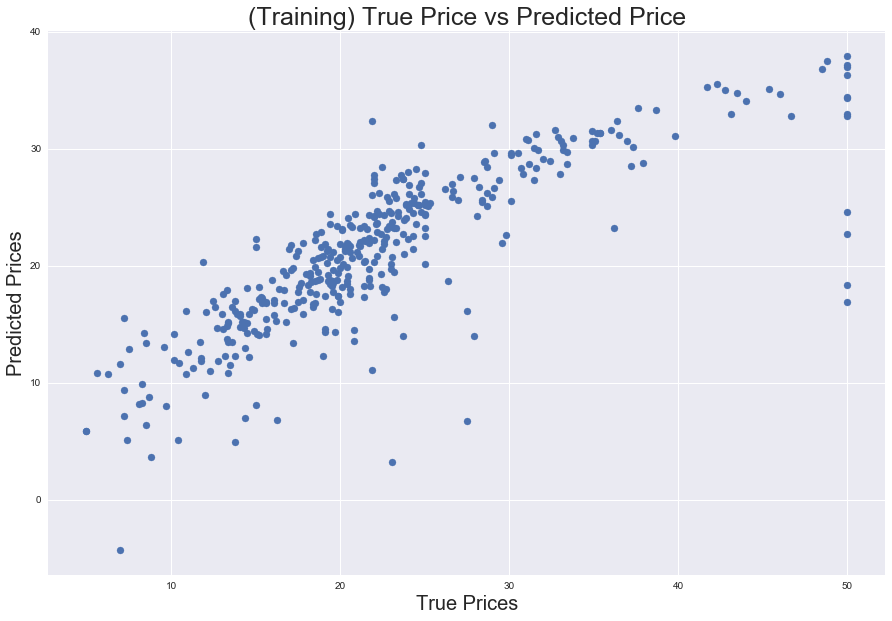

In [485]:
plt.figure(figsize=(15,10))
plt.scatter(Y_train, Y_train_pred)
plt.xlabel("True Prices", size=20)
plt.ylabel("Predicted Prices", size=20)
plt.title("(Training) True Price vs Predicted Price", size=25)
plt.show()

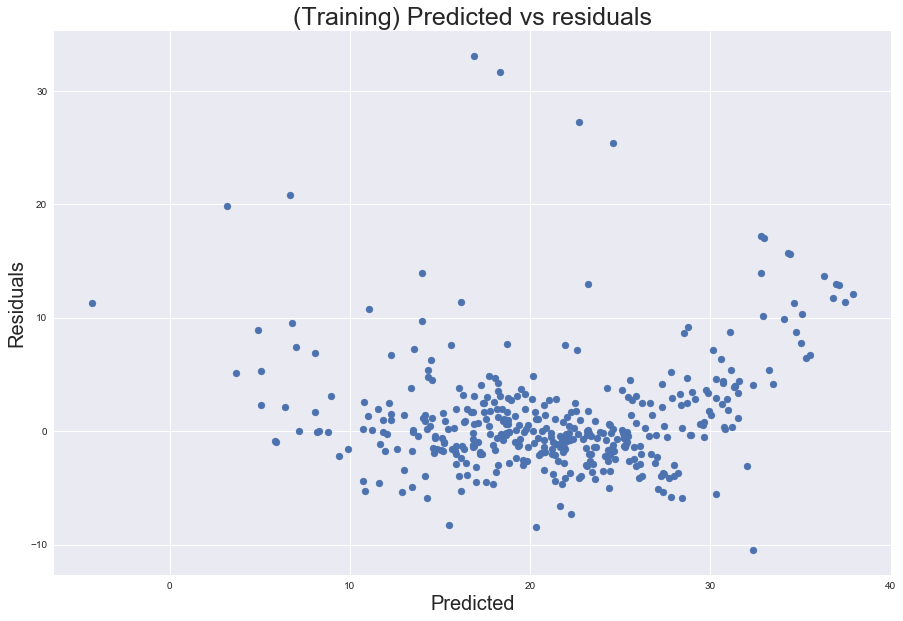

In [486]:
plt.figure(figsize=(15,10))
plt.scatter(Y_train_pred,train_residuals)
plt.xlabel("Predicted", size=20)
plt.ylabel("Residuals", size=20)
plt.title("(Training) Predicted vs residuals", size=25)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


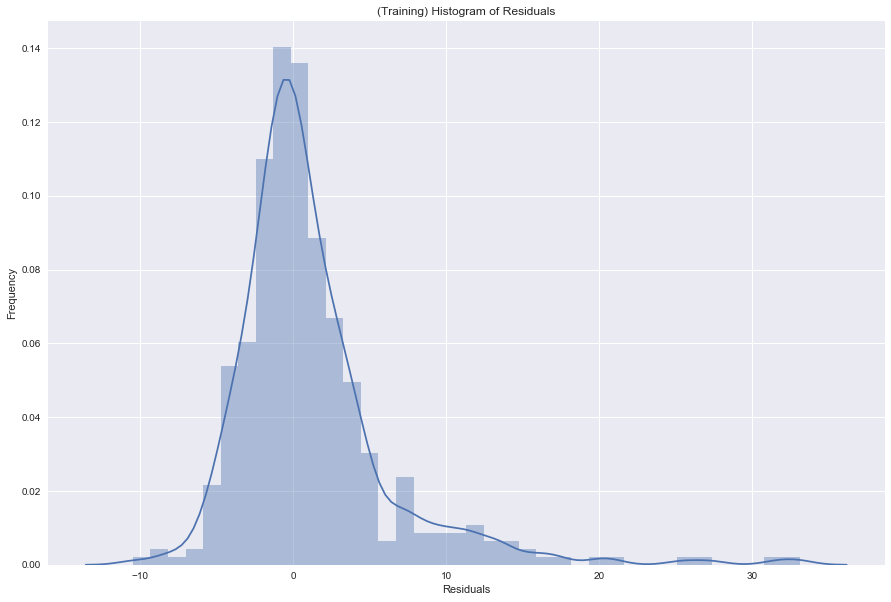

In [487]:
plt.figure(figsize=(15,10))
sns.distplot(train_residuals)
plt.title("(Training) Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

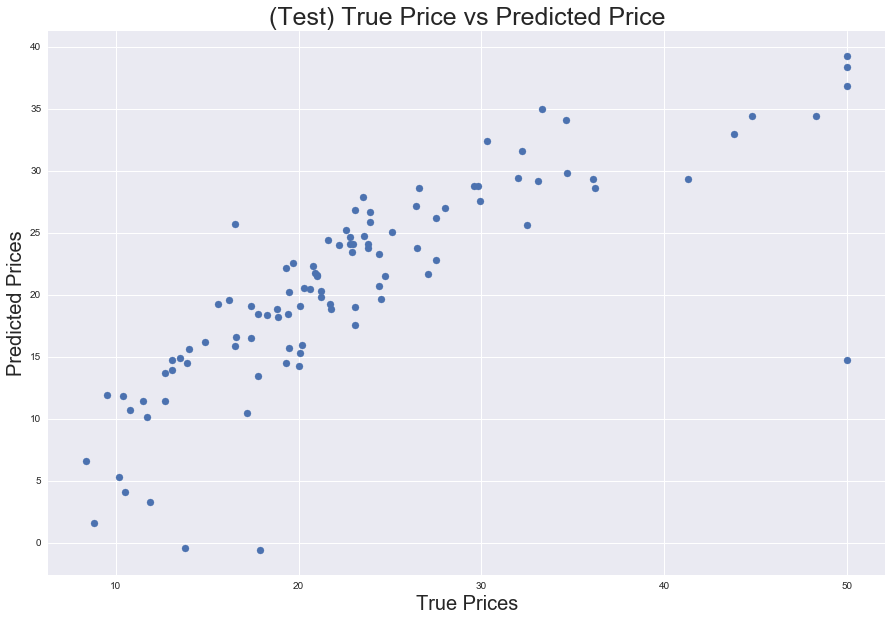

In [488]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test, Y_test_pred)
plt.xlabel("True Prices", size=20)
plt.ylabel("Predicted Prices", size=20)
plt.title("(Test) True Price vs Predicted Price", size=25)
plt.show()

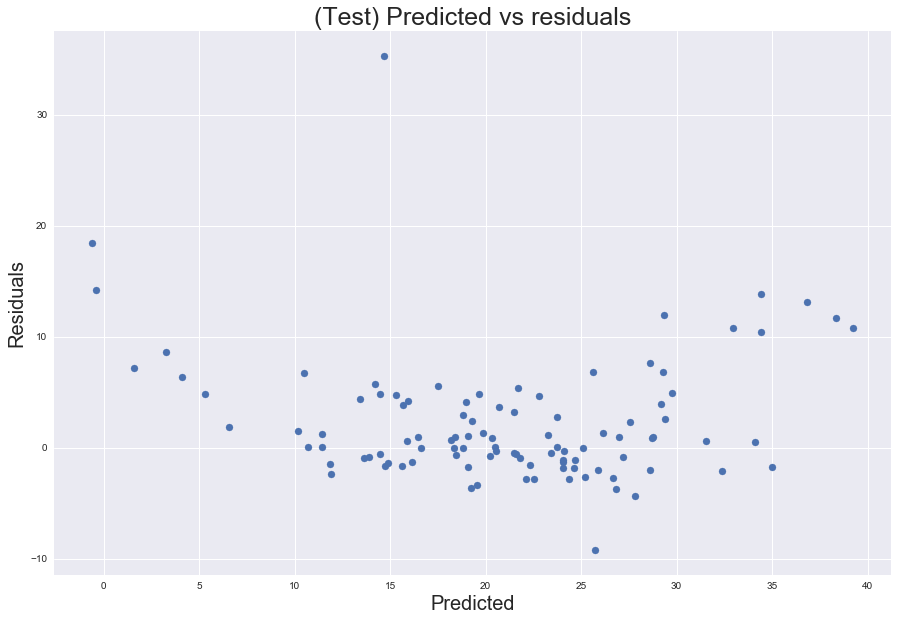

In [489]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test_pred,test_residuals)
plt.xlabel("Predicted", size=20)
plt.ylabel("Residuals", size=20)
plt.title("(Test) Predicted vs residuals", size=25)
plt.show()

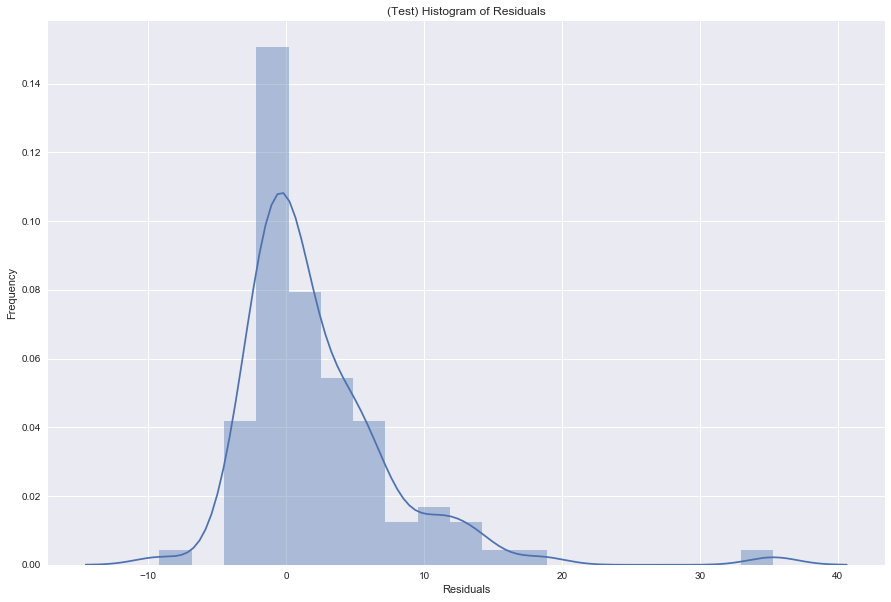

In [490]:
plt.figure(figsize=(15,10))
sns.distplot(test_residuals)
plt.title("(Test) Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

#### Do you think there are any issues with the model? Are there any values or patterns seen in the previous graphs? 

**Ans:**

Well we can clearly see that the model works to some extent because when we run the model on our training data and then predict it for our testing data, all the graphs that we have plotted above seem to give the same pattern. And we can see the points for our True values and predicted values for both Training and testing data closely match. Furthermore we can see that both the residual graphs are normal distributions which they should be for a Linear Regression.

### Using L1 Regularization and L2 Regularization

Here you'll use [L1 Regularization](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV) and [L2 Regularization](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) from SKLearn to implement the regression. Use similar evaluation metrics as before to figure out which model has performed better. You can also use the ML Tutorial notebooks for help.

In [264]:
from sklearn.linear_model import LassoCV, RidgeCV

print(X_train.shape)
Y_train = Y_train.reshape((404,))
print(Y_train.shape)
print(X_test.shape)
Y_test = Y_test.reshape((102,))
print(Y_test.shape)

(404, 10)
(404,)
(102, 10)
(102,)


#### L1 Regularization

In [270]:
L1_regressor = LassoCV(cv = 4)
L1_regressor.fit(X_train, Y_train)

LassoCV(alphas=None, copy_X=True, cv=4, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [271]:
Y_train_pred_L1 = L1_regressor.predict(X_train)
Y_test_pred_L1 = L1_regressor.predict(X_test)
train_residuals_L1 = Y_train_pred_L1 - Y_train
test_residuals_L1 = Y_test_pred_L1 - Y_test

print("The Mean Squared Error on train set with L1 Regularization is:", 
      mean_squared_error(Y_train, Y_train_pred_L1))
print("The Absolute Error on train set with L1 Regularization is:", 
      mean_absolute_error(Y_train, Y_train_pred_L1))
print("The Mean Squared Error on test set with L1 Regularization is:", 
      mean_squared_error(Y_test, Y_test_pred_L1))
print("The Absolute Error on test set with L1 Regularization is:", 
      mean_absolute_error(Y_test, Y_test_pred_L1))

The Mean Squared Error on train set with L1 Regularization is: 26.571487173581573
The Absolute Error on train set with L1 Regularization is: 3.498990049888648
The Mean Squared Error on test set with L1 Regularization is: 25.480087316508428
The Absolute Error on test set with L1 Regularization is: 3.635124484189449


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[-0.0805136   0.          0.         -0.          3.25677218  0.20154317
 -0.         -1.68056891  0.8804999  -3.67287399]
Mean of weights: -0.10951412472446505
Standard Dev of weights: 1.6620267439347756


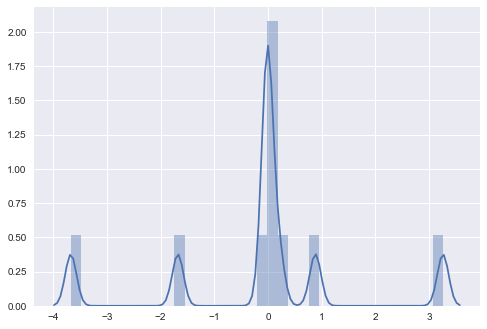

In [272]:
L1_Norm = L1_regressor.coef_
sns.distplot(L1_Norm)
print(L1_Norm)
print("Mean of weights:", np.mean(L1_Norm))
print("Standard Dev of weights:",np.std(L1_Norm))
plt.show()

In [273]:
L1_TrainPredict = L1_regressor.predict(X_train)
L1_TestPredict = L1_regressor.predict(X_test)

print("Train error is:", mean_squared_error(Y_train, L1_TrainPredict))
print("Test error is:", mean_squared_error(Y_test, L1_TestPredict))

Train error is: 26.571487173581573
Test error is: 25.480087316508428


#### L2 Regularization

In [274]:
L2_regressor = RidgeCV(cv= 4)# 404 is easily divisible by 4
L2_regressor.fit(X_train, Y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=4, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [277]:
Y_train_pred_L2 = L2_regressor.predict(X_train)
Y_test_pred_L2 = L2_regressor.predict(X_test)
train_residuals_L2 = Y_train_pred_L2 - Y_train
test_residuals_L2 = Y_test_pred_L2 - Y_test

print("The Mean Squared Error on train set with L2 Regularization is:", 
      mean_squared_error(Y_train, Y_train_pred_L2))
print("The Absolute Error on train set with L2 Regularization is:", 
      mean_absolute_error(Y_train, Y_train_pred_L2))
print("The Mean Squared Error on test set with L2 Regularization is:", 
      mean_squared_error(Y_test, Y_test_pred_L2))
print("The Absolute Error on test set with L2 Regularization is:", 
      mean_absolute_error(Y_test, Y_test_pred_L2))

The Mean Squared Error on train set with L2 Regularization is: 26.027174839287763
The Absolute Error on train set with L2 Regularization is: 3.4755775228808172
The Mean Squared Error on test set with L2 Regularization is: 26.16387353189893
The Absolute Error on test set with L2 Regularization is: 3.670998648122026


[-0.34121332  0.11894925  0.3231495  -0.55898251  3.25487078  0.9506823
  0.23461411 -1.9948281   1.03196769 -3.93916733]
Mean of weights: -0.09199576121555668
Standard Dev of weights: 1.8049152455654


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


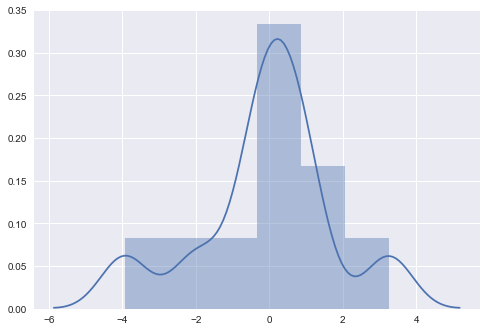

In [278]:
L2_Norm = L2_regressor.coef_
sns.distplot(L2_Norm)
print(L2_Norm)
print("Mean of weights:", np.mean(L2_Norm))
print("Standard Dev of weights:",np.std(L2_Norm))
plt.show()

In [279]:
L2_TrainPredict = L2_regressor.predict(X_train)
L2_TestPredict = L2_regressor.predict(X_test)

print("Train error is:", mean_squared_error(Y_train, L2_TrainPredict))
print("Test error is:", mean_squared_error(Y_test, L2_TestPredict))

Train error is: 26.027174839287763
Test error is: 26.16387353189893


#### L1 and L2 Visualization

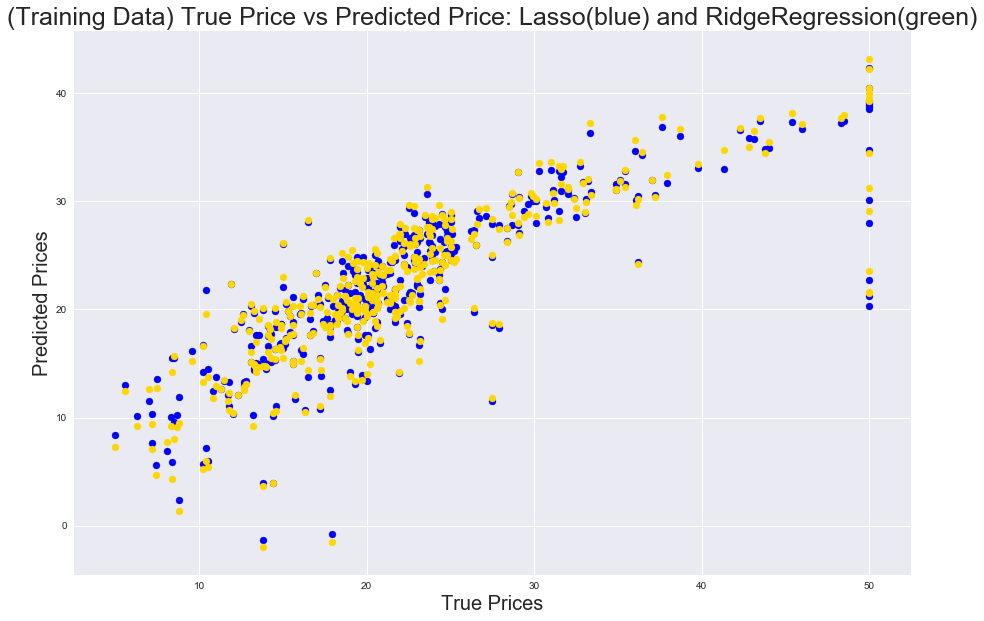

In [282]:
plt.figure(figsize=(15,10))
plt.scatter(Y_train, Y_train_pred_L1, color = 'blue')
plt.scatter(Y_train, Y_train_pred_L2, color = 'gold')
plt.xlabel("True Prices", size=20)
plt.ylabel("Predicted Prices", size=20)
plt.title("(Training Data) True Price vs Predicted Price: Lasso(blue) and RidgeRegression(green)", size=25)
plt.show()

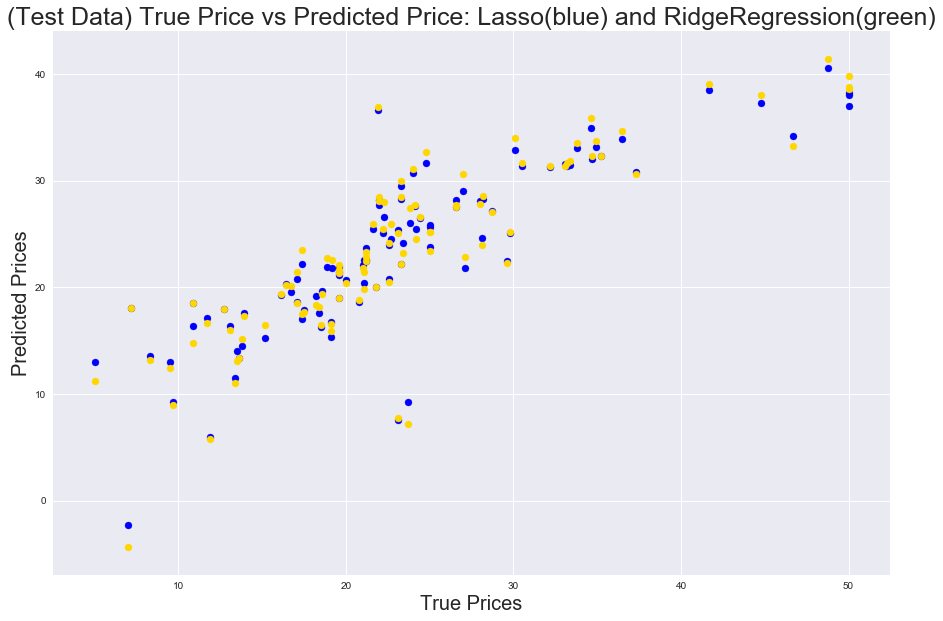

In [284]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test, Y_test_pred_L1, color = 'blue')
plt.scatter(Y_test, Y_test_pred_L2, color = 'gold')
plt.xlabel("True Prices", size=20)
plt.ylabel("Predicted Prices", size=20)
plt.title("(Test Data) True Price vs Predicted Price: Lasso(blue) and RidgeRegression(green)", size=25)
plt.show()

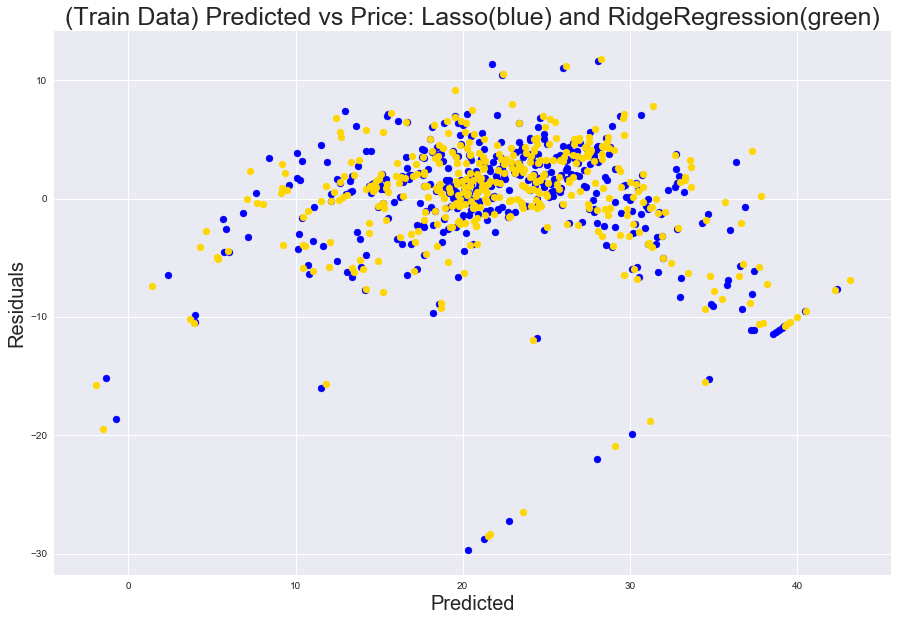

In [286]:
plt.figure(figsize=(15,10))
plt.scatter(Y_train_pred_L1,train_residuals_L1, color = 'blue')
plt.scatter(Y_train_pred_L2,train_residuals_L2,color = 'gold')
plt.xlabel("Predicted", size=20)
plt.ylabel("Residuals", size=20)
plt.title("(Train Data) Predicted vs Price: Lasso(blue) and RidgeRegression(green)", size=25)
plt.show()

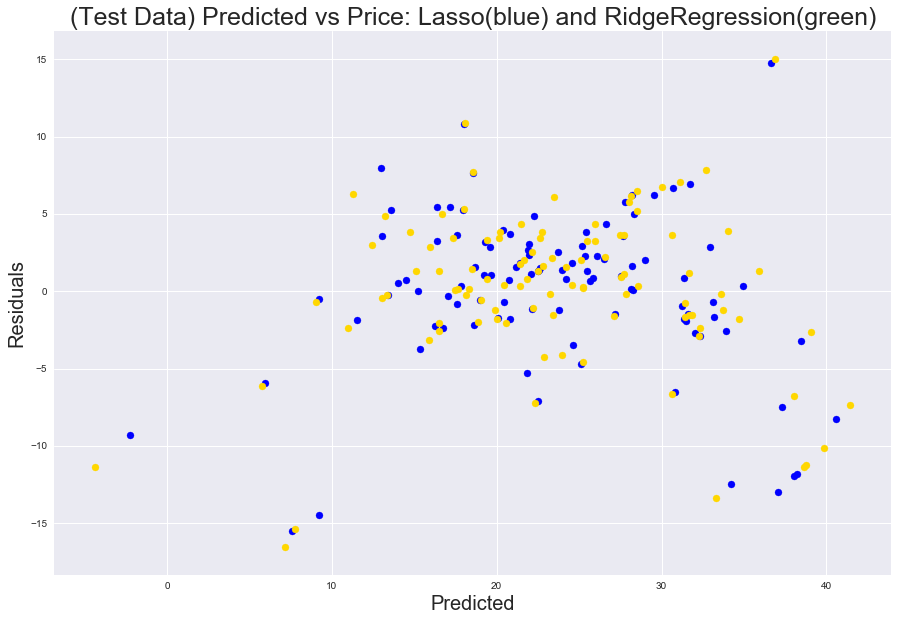

In [288]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test_pred_L1,test_residuals_L1, color = 'blue')
plt.scatter(Y_test_pred_L2,test_residuals_L2,color = 'gold')
plt.xlabel("Predicted", size=20)
plt.ylabel("Residuals", size=20)
plt.title("(Test Data) Predicted vs Price: Lasso(blue) and RidgeRegression(green)", size=25)
plt.show()



## Descriptive Questions

#### Question 1: Which model performed better? Why do you say it was better?

**Ans:**
When we are comparing the three models (Linear Regression, Lasso Regression, Ridge Regression) the two Regularization Regression Models can not be differentiated as which is the better model as both have almost the exactly same mean squared and absolute error for our training and test error. However we can see that the Linear Regression Model (Class) we made gives a higher error in comparison with a mse of ~36 compared to the regularization regression models wwhich were around ~26

#### Question 2

Suppose we estimate the regression coefficients in a linear regression model by minimizing

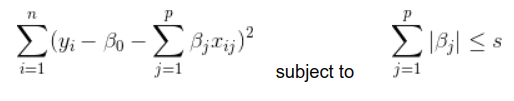

for a particular value of s. For each of the following indicate which one of i. through v. is correct.  Justify your answer.

i. Increase initially, and then eventually start decreasing in an inverted U shape.

ii. Decrease initially, and then eventually start increasing in  a U shape.

iii. Steadily increase.

iv. Steadily decrease.

v. Remain constant


**As, we increase s from 0**, explains what happens to each of the following: (a)  training RSS,  (b) test RSS, and (c) variance

**Ans:**
<br/>
As we increase the regularization constant:

- training RSS
    - Steadily decrease. As we increase s from 0, we are restricting the βj coefficients less and less (the coefficients will increase to their least squares estimates), and so the model is becoming more and more flexible which provokes a steady decrease in the training RSS.
- test RSS
    - Decrease initially, and then eventually start increasing in a U shape. As we increase s from 0, we are restricting the βj coefficients less and less (the coefficients will increase to their least squares estimates), and so the model is becoming more and more flexible which provokes at first a decrease in the test RSS before increasing again after that in a typical U shape.
- variance
    - Steadily increase. As we increase s from 0, we are restricting the βj coefficients less and less (the coefficients will increase to their least squares estimates), and so the model is becoming more and more flexible which provokes a steady increase in variance.

#### Question 3:

Suppose we estimate the regression coefficients in a linear regression model by minimizing

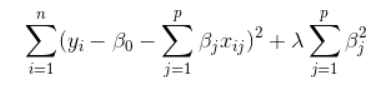

for a particular value of 𝛌. For each of the following indicate which one of i. through v. is correct.  Justify your answer.

i. Increase initially, and then eventually start decreasing in an inverted U shape.

ii. Decrease initially, and then eventually start increasing in  a U shape.

iii. Steadily increase.

iv. Steadily decrease.

v. Remain constant


**As, we increase  𝛌 from 0**, explains what happens to each of the following: (a)  training RSS,  (b) test RSS, and (c) variance


**Ans:**
<br/>
As we increase the regularization constant:

- training RSS
    - Steadily increase. As we increase λ from 0, we are restricting the βj coefficients more and more (the coefficients will deviate from their least squares estimates), and so the model is becoming less and less flexible which provokes a steady increase in training RSS.

- test RSS
    - Decrease initially, and then eventually start increasing in a U shape. As we increase λ from 0, we are restricting the βj coefficients more and more (the coefficients will deviate from their least squares estimates), and so the model is becoming less and less flexible which provokes at first a decrease in the test RSS before increasing again after that in a typical U shape.

- variance
    - Steadily decrease. As we increase λ from 0, we are restricting the βj coefficients more and more (the coefficients will deviate from their least squares estimates), and so the model is becoming less and less flexible which provokes a steady decrease in variance.

## Part 2: Logistic Regression
Here you will be working on a classification problem from a dataset that we load from sklearn. Logistic Regression uses almost the same algorithm as Linear Regression with Gradient Descent, but the final output has a Sigmoid (Or a Softmax) *Activation Function* applied to it. Don't worry if you do not understand what this means, all you need to know is converts a continuous output into a Probability Distribution between 0 and 1.

[This link](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python) will teach you everything you need to know about Logistic Regression and applying it to this problem below.


**The Problem:** Given a piece of text, you want to classify it into one of four categories: 
1. Alternate-Atheism 
2. Religious - Christian 
3. Computer-Graphics
4. Scientific-Medicine

You will have to feature engineer the raw input into a more suitable input for logistic regression

### Dataset Loading

In [196]:
from sklearn.datasets import fetch_20newsgroups

In [197]:
# Only four categories are loaded to keep the dataset size manageable
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
dataset = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
target_names = dataset.target_names

data_train = fetch_20newsgroups(subset='train', categories=categories)
data_test = fetch_20newsgroups(subset='test', categories=categories)

X = dataset.data
Y = dataset.target

print("X is of length:", len(X), '\n')
print("All labels are:", np.unique(Y))
print("This label corresponds to:", target_names[Y[0]], '\n')


X_train = data_train.data
Y_train = data_train.target
print("X_train is of length:", len(X_train), '\n')
print("All labels are:", np.unique(Y_train))
print("This label corresponds to:", target_names[Y_train[0]],'\n')


X_test = data_test.data
Y_test = data_test.target
print("X_test is of length:", len(X_test), '\n')
print("All labels are:", np.unique(Y_test))
print("This label corresponds to:", target_names[Y_test[0]],'\n')

X is of length: 3759 

All labels are: [0 1 2 3]
This label corresponds to: sci.med 

X_train is of length: 2257 

All labels are: [0 1 2 3]
This label corresponds to: comp.graphics 

X_test is of length: 1502 

All labels are: [0 1 2 3]
This label corresponds to: sci.med 



In [198]:
print("First datapoint:", X[0])

First datapoint: 
Where did you read this?  I don't think this is true.  I think most
medical treatments are based on science, although it is difficult
to prove anything with certitude.  It is true that there are some
things that have just been found "to work", but we have no good
explanation for why.  But almost everything does have a scientific
rationale.  The most common treatment for prostate cancer is
probably hormone therapy.  It has been "proven" to work.  So have
radiation and chemotherapy.  What treatments did the article say
are not proven?  

-- 
----------------------------------------------------------------------------
Gordon Banks  N3JXP      | "Skepticism is the chastity of the intellect, and
geb@cadre.dsl.pitt.edu   |  it is shameful to surrender it too soon." 


### Feature Engineering + Preprocessing

Your best friend is the [Scikit-Learn CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer). YOu can use to carry out the feature extraction. It has an in-built feature for n-gram vectorization as well. Do check out the documentation to figure out how to use simple Bag of Words and N-Gram vectorization. 

In [199]:
from sklearn.feature_extraction.text import CountVectorizer

#### Using Bag of Words Representation

In [200]:
BoW_vectorizer = CountVectorizer(stop_words = "english")
BoW_vectorizer.fit(X_train) 
BoW_features = BoW_vectorizer.get_feature_names()
BoW_data = BoW_vectorizer.transform(X_train)
display(pd.DataFrame(BoW_data.todense(),columns=BoW_vectorizer.get_feature_names()).head())

,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,...,zvi,zvonko,zwart,zyeh,zyklon,zyxel,zz,zzz,ªl,íålittin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Using N-Gram Representation

In [201]:
NGram_vectorizer = CountVectorizer(stop_words = "english", ngram_range=(1,2))
NGram_vectorizer.fit(X_train)
NGram_features = NGram_vectorizer.get_feature_names()
NGram_data = NGram_vectorizer.transform(X_train)
display(pd.DataFrame(NGram_data.todense(),columns=NGram_vectorizer.get_feature_names()).head())

,00,00 00,00 00am,00 01,00 08,00 09,00 10,00 11,00 15am,00 1993,...,zyklon immediate,zyxel,zyxel 14,zyxel v32bis,zz,zzz,ªl,ªl r0506048,íålittin,íålittin 92
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Logistic Regression
Here you'll be using the [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV) library from SKlearn (this one uses in-built cross validation as well). This part is open-ended and meant for you to explore how to change hyperparameters to get a good result. The coding here is simple - the only job you have to do is look at the documentation

In [202]:
dict = {
    'Text': dataset.data,
    'Target': dataset.target
}
textDF = pd.DataFrame(dict)
textDF

,Text,Target
0,\nWhere did you read this? I don't think this...,2
1,[Someone quoted the following. I've removed t...,3
2,\n,3
3,I've been away for a couple of weeks and have ...,1
4,FYI...I just posted this on alt.psychoactives ...,2
...,...,...
3754,I may not be the world's greatest expert on ch...,2
3755,Archive-name: typing-injury-faq/general\nVersi...,2
3756,\nYou forgot the smiley-face.\n\nI can't belie...,2
3757,"\nThat's funny, I thought you were making a st...",0


The classes are balanced 

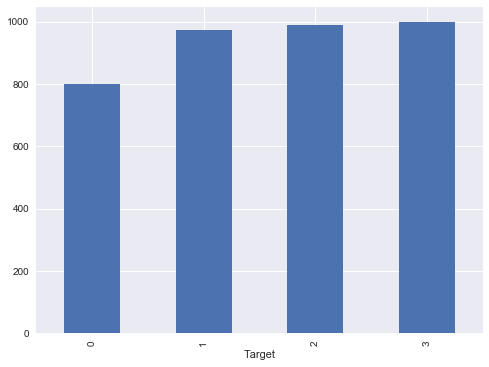

In [203]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
textDF.groupby('Target').Text.count().plot.bar(ylim=0)
plt.show()

In [204]:
from sklearn.linear_model import LogisticRegressionCV

In [205]:
BoW_classifier = LogisticRegressionCV(class_weight='balanced',
                                                 max_iter=10000, verbose=1).fit(BoW_data, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   25.6s finished


In [206]:
NGram_classifier = LogisticRegressionCV(class_weight='balanced',
                                                 max_iter=10000, verbose=1).fit(NGram_data, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  3.0min finished


### Evaluation
Use scikit-learn's [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion_matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) to to see how good your models are. You can use the functions provided in the documentation. Data Science is about finding the right libraries to do the job, and again, the coding is simple, your job is to find the right functions.

In [208]:
X_test_BoW= BoW_vectorizer.transform(X_test)
Y_test=data_test.target
BoW_classifier.score(X_test_BoW,Y_test)

0.8948069241011984

In [209]:
X_test_NGram= NGram_vectorizer.transform(X_test)
NGram_classifier.score(X_test_NGram,Y_test)

0.9007989347536618

In [211]:
BoW_Predict = BoW_classifier.predict(BoW_vectorizer.transform(X_test))
NGram_Predict = NGram_classifier.predict(NGram_vectorizer.transform(X_test))

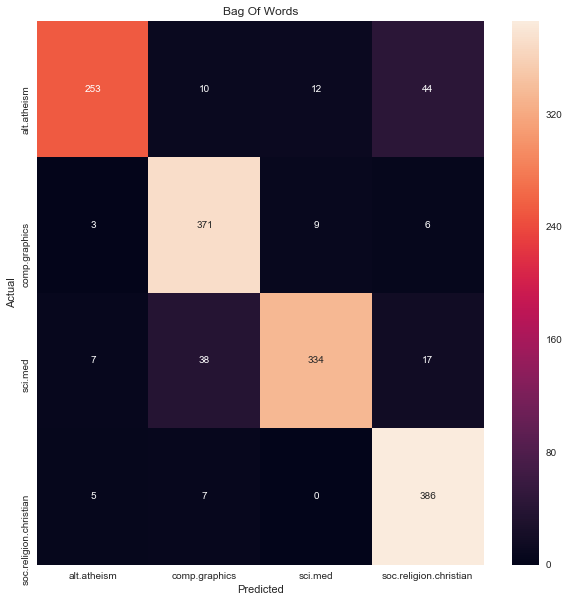

In [225]:
from sklearn.metrics import confusion_matrix
BoW_conf_mat = confusion_matrix(Y_test, BoW_Predict)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(BoW_conf_mat, annot=True, fmt='d',
            xticklabels= target_names , yticklabels= target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Bag Of Words')
plt.show()

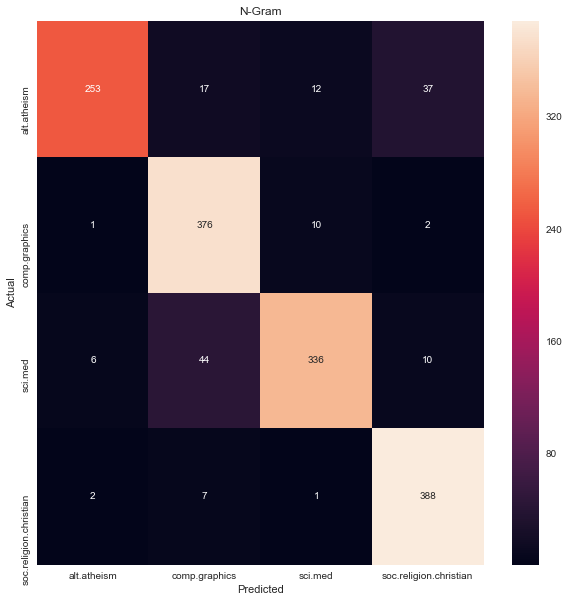

In [226]:
NGram_conf_mat = confusion_matrix(Y_test, NGram_Predict)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(NGram_conf_mat, annot=True, fmt='d',
            xticklabels= target_names , yticklabels= target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('N-Gram')
plt.show()

In [219]:
from sklearn.metrics import accuracy_score
print('Accuracy for Bag Of Words: ',accuracy_score(Y_test, BoW_Predict))
print('Accuracy for NGram: ',accuracy_score(Y_test, NGram_Predict))

Accuracy for Bag Of Words:  0.8948069241011984
Accuracy for NGram:  0.9007989347536618


In [229]:
recall = np.diag(BoW_conf_mat) / np.sum(BoW_conf_mat, axis = 1)
precision = np.diag(BoW_conf_mat) / np.sum(BoW_conf_mat, axis = 0)
print('Average Recall and Average Precision for BoW: ',np.mean(recall), np.mean(precision))

Average Recall and Average Precision for BoW:  0.8900286360920241 0.9019660175477431


In [228]:
recall = np.diag(NGram_conf_mat) / np.sum(NGram_conf_mat, axis = 1)
precision = np.diag(NGram_conf_mat) / np.sum(NGram_conf_mat, axis = 0)
print('Average Recall and Average Precision for NGram: ',np.mean(recall), np.mean(precision))

Average Recall and Average Precision for NGram:  0.89576091137094 0.9090751757469755


### Which model was better? Why? Answer in terms of accuracy score and confusion matrix values

**Ans:**

We can see through our evaluation Metrics that NGram Model and Bag Of Words Model are almost exactly the same. Our Accuracy Score for both NGram Model and BoW Model varies by 0.6% as is the same case for our Average Precision and Average Recall which differ by extremely small values. Since thje difference between the error isnt significant we cant choose one model as being better than the other for our dataset. However we can conclude that both models give a fairly good accuracy for our multitext classification.